<a href="https://colab.research.google.com/github/Seblao/Machine-Learning/blob/main/2.1.ML_KNN_Classificat%C2%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
titanic = sns.load_dataset('titanic')
titanic['survived'] = titanic['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')

In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**We are going to learn machine learning concepts with the titanic dataset, one of the most infamous shipwrecks in history.**

Also as a fun fact, this dataset is one of the most famous datasets around in terms of machine learning next to the MNIST and Iris dataset!

# Data preprocessing


Machine learning is nothing without fine data preprocessing and feature engineering.  
Modify the titanic dataset by:

* Selecting dedicated and useful features (i.e columns), only these ones : `survived`, `pclass`, `sex`, `age`, `embark_town`
* Removing rows with NaN data
* Use `factorize` to recode features `sex` (gender) and `embark_town` (the harbour city) into numerical data, because ML needs (and loves) numerical data.

*NB : please really use `factorize`. We'll use `get_dummies`at the end of the quest, to compare it.*

Your should get something like that:

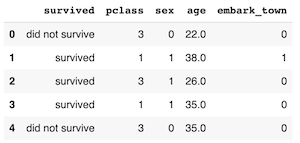

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [4]:
import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [278]:
df = pd.read_csv("titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [281]:
titanic = df[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]
titanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [282]:
# Suppress° des lignes avec des NaN :
titanic_1 = titanic.dropna()

In [283]:
titanic_1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Embarked,0


In [284]:
# Factorisat° des colonnes 'Sex' et 'Embarked' :
titanic_1["Sex"], sex_mapping = pd.factorize(titanic_1["Sex"])
titanic_1["Embarked"], embarked_mapping = pd.factorize(titanic_1["Embarked"])

titanic_1.head()

<ipython-input-284-26efa385571c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_1["Sex"], sex_mapping = pd.factorize(titanic_1["Sex"])
<ipython-input-284-26efa385571c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_1["Embarked"], embarked_mapping = pd.factorize(titanic_1["Embarked"])


,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,0
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,0
4,0,3,0,35.0,0


# KNN classification with Scikit-Learn

## Train Test Split Data


First you have to divide the titanic dataframe into 2 separated dataframes :
  - `y` with the feature to be predicted (i.e. survived)
  - `X` with the other features that will be used for the model (all numeric features + sex recoded with factorize + embark_town recoded with factorize)

Your `X` should be something like that:

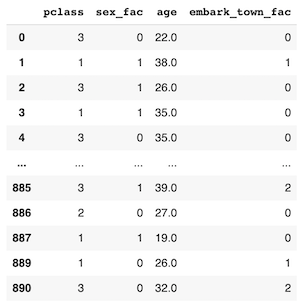


In [285]:
# Étape 1 : Sépare X (features) et y (cible) :
X = titanic_1[['Pclass', 'Sex', 'Age', 'Embarked']]
y = titanic_1['Survived']


And then from `X` and `y`, you need to separate them for training and testing your model :
* Use 75% of data for training, the rest for testing
* Please split data with `random_state = 55`

[See the previous quest on train-test split if needed](https://odyssey.wildcodeschool.com/quests/581)

In [ ]:
# Your code here
X_train, X_test, y_train, y_test =
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

In [286]:
# Étape 2 : Divise en données d'entraînemt et de test (75% / 25%) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

## Model initialization

CONGRATS !!! You are going to develop your first ML model for KNN classification.  
For that, please create a `model` object that initialises your model with the KNN classifier


[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [287]:
# Étape 3 : Créer le modèle KNN :

knn = KNeighborsClassifier(n_neighbors=5)

# Étape 4 : Entraîne le modèle
knn.fit(X_train, y_train)

# Étape 5 : Prédis et évalue
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy du modèle KNN : {accuracy:.2f}")

Accuracy du modèle KNN : 0.78


## Model fitting


Now you have to fit your model on the training data.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [288]:
# Entraîne le modèle sur les données d'entraînemt :
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [289]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## Make predictions

You model is ready for prediction !

Make prediction for yourself !  
Change the data below and evaluate your chance of survival ...

In [ ]:
# Your code here
my_class = 3 # 3 = 3ème classe
my_sex = 0   # 0 = homme,
my_age = 28
my_town = 0 # 0 = Southampton (S)
my_data = np.array([my_class, my_sex, my_age, my_town]).reshape(1,4)
print(model.predict(my_data))

In [290]:
# Prédict° personnalisée :
my_class = 3
my_sex = 0
my_age = 28
my_town = 0

# Créer la donnée utilisateur :
my_data = pd.DataFrame([[my_class, my_sex, my_age, my_town]],
                       columns=['Pclass', 'Sex', 'Age', 'Embarked'])

# Prédict° :
my_prediction = knn.predict(my_data)
print("Survivant" if my_prediction[0] == 1 else "Non survivant")

Non survivant


In [291]:
# Then you can execute this code to see probabilities per class
for i, j in zip(model.classes_, model.predict_proba(my_data)[0]):
  print("Prediction probability for:", i, "is", j)

Prediction probability for: 0 is 1.0
Prediction probability for: 1 is 0.0


In [292]:
# Affiche les probabilités pr chaq classe (0 = Non survivant, 1 = Survivant) :
for classe, proba in zip(knn.classes_, knn.predict_proba(my_data)[0]):
    print(f"Probabilité pour la classe {classe} : {proba:.2f}")

Probabilité pour la classe 0 : 1.00
Probabilité pour la classe 1 : 0.00


## Model evaluation

Last but not least, you should evaluate the accuracy of your model.  
You can compute the **accuracy score**  directly with the well-known `.score()` method. Remember to compare train score and test score to evaluate overfitting.
Please remember that other metrics are available to evaluate classification models such as precision, recall, f1 score and all together compose the `confusion matrix`.

In [293]:
# Your code here to compare test and train score (accuracy score). Is there overfitting?
# Score sur l'ensble d'entraînemt :
train_score = knn.score(X_train, y_train)

# Score sur l'ensble de test :
test_score = knn.score(X_test, y_test)

print(f"Score d'entraînemt : {train_score:.2f}")
print(f"Score de test : {test_score:.2f}")

Score d'entraînemt : 0.83
Score de test : 0.78


Score d'entrainemt > score Test : suremt surapprentissage (Overfitting)

In [ ]:
# You can execute this code to get the confusion matrix

from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

In [295]:
# Matrice de confus° :
cm = confusion_matrix(y_test, knn.predict(X_test))

# Noms des classes :
class_names = ["Non survivant", "Survivant"]

# Créer 1 DataFrame :
confusion_df = pd.DataFrame(data=cm,
                            index=[name + " (réel)" for name in class_names],
                            columns=[name + " (prévu)" for name in class_names])

confusion_df

,Non survivant (prévu),Survivant (prévu)
Non survivant (réel),97,19
Survivant (réel),20,42


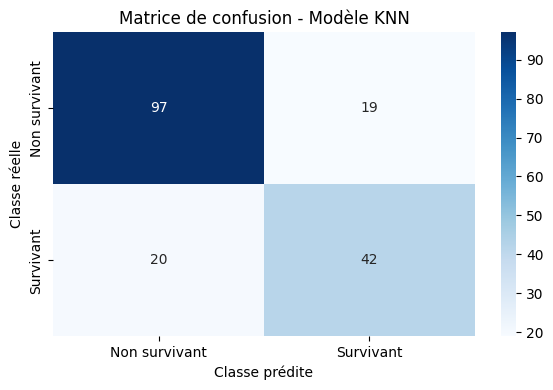

In [296]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion - Modèle KNN")
plt.tight_layout()
plt.show()

**How many false positives are there?  In other words, how many people were predicted to die when in fact they survived?**

Performances of our model are pretty poor and could be explained by the original dataset.  
Anoher way is to tune the hyperparameter such as the number of neighbors ...

In [297]:
cm = confusion_matrix(y_test, knn.predict(X_test))
faux_positifs = cm[0][1]
print(f"Faux positifs : {faux_positifs}")

Faux positifs : 19


- Plusieurs raisons possibles ont pu influencé les performances faibles du modèle :
* Limites des données :
- Peu de variables explicatives (seulement 4),

* Pas d'autres v.a comme Fare, SibSp, Parch, ou Cabin, qui pvent-ê très pertinentes,

* Bcp de vleurs manquantes à l’origine (ex : Age...).


- Limites des Hyperparamètres du modèle :
* on utilise : n_neighbors=5,

KNN est sensible au choix de k, à la distance utilisée, et au scaling des données.

## Hyperparameter - improve you model


Let's play with the `n_neighbors` and `weights` hyperparameters of the model.  
* Evaluate the accuracy score (only on the test set) of your models by adjusting the hyperparameter `n_neighbors`  from 2 to 10, and changing `weights` between `uniform` and `distance`.
* What is the values of `n_neighbors` and `weights` that leads to the best score ?

*NB: you could use a loop to test the different hyperparameter values*

*Tip: you should find as optimal value `n_neighbors = 2` and `weights = 'distance'`, with a test score value of `0.809`.*

In [ ]:
# Your code here

for i in range(2,11):

In [298]:
# Liste pr stocker les résultats :
results = []

# Test de différentes cbinais° de k et weights :
for k in range(2, 11):
    for weight in ['uniform', 'distance']:
        model = KNeighborsClassifier(n_neighbors=k, weights=weight)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        # Stocke les résultats ds la liste :
        results.append({
            'n_neighbors': k,
            'weights': weight,
            'accuracy': round(score, 3)
        })

# Convertis en DataFrame :
results_df = pd.DataFrame(results)

# Trie pr afficher les meilleurs résultats en haut :
results_df = results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

results_df

,n_neighbors,weights,accuracy
0,2,distance,0.809
1,7,distance,0.809
2,8,distance,0.803
3,4,distance,0.803
4,9,distance,0.803
5,3,distance,0.798
6,3,uniform,0.792
7,7,uniform,0.792
8,6,uniform,0.792
9,5,distance,0.787


Les vleurs de n_neighbors et weights qui donnent les meilleurs scores sont :
- neighbors = 2 et 7,
- weights = distance.

# Let's go back to data processing to improve our model


In [320]:
# Let's re-import data in a new dataset to compare, just execute the code below:
titanic2 = sns.load_dataset('titanic')
titanic2['survived'] = titanic2['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')
titanic2.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,did not survive,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,did not survive,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,did not survive,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,survived,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,survived,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Please do the same data processing as previously, but change `embark_town` (the harbour city) with get_dummies (and not factorize).
Then initialize, fit and score your model. Is it better?

In [321]:
df1 = titanic2

# Convertir 'survived' en 0/1
df1['survived'] = df1['survived'].map({'survived': 1, 'did not survive': 0})

In [322]:
# Encodage de 'sex' :
df1['sex'] = df1['sex'].map({'male': 0, 'female': 1})

In [323]:
df1.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [324]:
# Remplir les vleurs manquantes :
df1['survived'] = df1['survived'].fillna(df1['survived'].median())
df1['sex'] = df1['sex'].fillna(df1['sex'].median())
df1['age'] = df1['age'].fillna(df1['age'].median())
df1 = df1.dropna(subset=['embark_town'])
df1.drop(columns='deck', inplace=True)

<ipython-input-324-59836fccc20b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='deck', inplace=True)


In [325]:
df1.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [326]:
df1['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [327]:
# One-hot encoding sur embarked :
pd.get_dummies(df1, columns=['embark_town'], drop_first=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,no,False,False,False,True
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,yes,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,yes,True,False,False,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,yes,False,False,False,True
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,no,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,no,True,False,False,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,yes,True,False,False,True
888,0,3,1,28.0,1,2,23.4500,S,Third,woman,False,no,False,False,False,True
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,yes,True,True,False,False


In [328]:
# Définis les features à utiliser :
features = ['pclass', 'sex', 'age'] + [col for col in df1.columns if col.startswith('embark_town_')]

X = df1[features]
y = df1['survived']

In [329]:
# Convertir les colonnes booléennes en int :
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

In [330]:
# Séparat° train/test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [331]:
# Modélisat° KNN :
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [332]:
# Score sur les données de test :
test_accuracy = knn.score(X_test, y_test)
print(f"🎯 Score de précis° sur test : {test_accuracy:.3f}")

🎯 Score de précis° sur test : 0.825


- Les résultats du test est bien meilleur que précédemment... :).

You should have a `X` like this one:

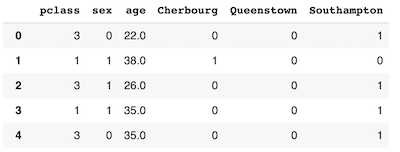

# Conclusions
* Congrats !!! You just landed on the MACHINE LEARNING CLASSIFICATION planet
* The KNN classifier is an algorithm from supervised learning part of ML
* Scikit learn is the to-know-and-to-love toolbox for ML
* Our KNN classifier could be improved with hyperparameter tuning.
* There is no perfect algorithm, we can very often improve a score by **feature engineering**, rather than looking for another algorithm
* Other algorithms should be tested for selecting the best one, but it is another story ... to be continued ML Data Wilders :)